### Cargamos las librerias necesarias para nuestra aplicación

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leer los archivos shapefile y csv
toponimos = gpd.read_file('toponimos.shp')
Data = pd.read_csv('Data.csv')

provinces = toponimos['Provincia'].unique()
print(provinces)

['TIERRA DEL FUEGO' 'CHOAPA' 'ULTIMA ESPERANZA' 'TALCA' 'CHANARAL'
 'COLCHAGUA' 'PARINACOTA' 'TAMARUGAL' 'PUNILLA' 'EL LOA' 'PETORCA'
 'ARAUCO' 'CARDENAL CARO' 'CORDILLERA' 'VALPARAISO' 'HUASCO' 'OSORNO'
 'AISEN' 'SAN FELIPE DE ACONCAGUA' 'VALDIVIA' 'MAGALLANES' 'COPIAPO'
 'SANTIAGO' 'TOCOPILLA' 'ANTOFAGASTA' 'LLANQUIHUE' 'ELQUI' 'ARICA'
 'QUILLOTA' 'CACHAPOAL' 'ANTARTICA CHILENA' 'BIO-BIO' 'COIHAIQUE' 'MAIPO'
 'CONCEPCION' 'CHILOE' 'MELIPILLA' 'MALLECO' 'CAPITAN PRAT' 'CAUTIN'
 'GENERAL CARRERA' 'LOS ANDES' 'CURICO' 'LIMARI' 'RANCO' 'CAUQUENES'
 'TALAGANTE' 'SAN ANTONIO' 'PALENA' 'CHACABUCO' 'IQUIQUE' 'ITATA'
 'DIGUILLIN' 'LINARES' 'NUBLE' 'ISLA DE PASCUA' None]


In [3]:
filtered_toponimos = toponimos[toponimos['Provincia'] == 'SANTIAGO']

comunas = {14166:'Cerrillos', 14156:'Cerro Navia', 14127:'Conchalí', 16165:'El Bosque', 14157:'Estación Central', 14158:'Huechuraba', 13167:'Independencia', 16110:'La Cisterna', 15128:'La Florida',  16131:'La Granja', 16154:'La Pintana', 15132:'La Reina', 15108:'Las Condes',  15161:'Lo Barnechea', 16164:'Lo Espejo', 14155:'Lo Prado', 15151:'Macul', 14109:'Maipú', 15105:'Ñuñoa', 16162:'Pedro Aguirre Cerda', 15152:'Peñalolén', 15103:'Providencia', 14111:'Pudahuel', 16301:'Puente Alto',  14114:'Quilicura', 14107:'Quinta Normal', 13159:'Recoleta', 14113:'Renca', 16401:'San Bernardo', 16163:'San Joaquín',  16106:'San Miguel', 16153:'San Ramón', 13101:'Santiago',  15160:'Vitacura'}

filtered_toponimos = filtered_toponimos[filtered_toponimos['cod_comuna'].isin(comunas.keys())]

merged_data = pd.merge(Data, filtered_toponimos[['cod_comuna', 'geometry']], left_on='Código Comuna', right_on='cod_comuna', how='left')

merged_data.drop('cod_comuna', axis=1, inplace=True)

merged_data.head()

,Rol,Cod,Comuna,Código Comuna,Dirección o nombre del predio,Destino Principal,Avalúo fiscal total,Contribución semestral (con aseo),Avalúo exento de la propiedad,"Superficie total del terreno de la propiedad (sin decimales, en m2)",Material Estructural,Calidad,Año de la línea de construcción,"Superficie de la línea de construcción (sin decimales, en m2 o m3 según tipo de construcción)",geometry
0,1-1,13101-1,Santiago,13101,ALAMEDA LIB. B. OHIGGINS 3 LC 1,"Comercio, Transporte y Telecomunicaciones, Adm...",94228657778,48093112,84755677015,763889,"-, Acero, Madera","Media Superior, Media Inferior, Superior, Medi...",1955,13800,POINT (-7865785.373 -3955214.589)
1,1-1,13101-1,Santiago,13101,ALAMEDA LIB. B. OHIGGINS 3 LC 1,"Comercio, Transporte y Telecomunicaciones, Adm...",94228657778,48093112,84755677015,763889,"-, Acero, Madera","Media Superior, Media Inferior, Superior, Medi...",1955,13800,POINT (-7864690.837 -3952978.928)
2,1-1,13101-1,Santiago,13101,ALAMEDA LIB. B. OHIGGINS 3 LC 1,"Comercio, Transporte y Telecomunicaciones, Adm...",94228657778,48093112,84755677015,763889,"-, Acero, Madera","Media Superior, Media Inferior, Superior, Medi...",1955,13800,POINT (-7862835.492 -3957426.184)
3,1-1,13101-1,Santiago,13101,ALAMEDA LIB. B. OHIGGINS 3 LC 1,"Comercio, Transporte y Telecomunicaciones, Adm...",94228657778,48093112,84755677015,763889,"-, Acero, Madera","Media Superior, Media Inferior, Superior, Medi...",1955,13800,POINT (-7866546.157 -3952978.932)
4,1-1,13101-1,Santiago,13101,ALAMEDA LIB. B. OHIGGINS 3 LC 1,"Comercio, Transporte y Telecomunicaciones, Adm...",94228657778,48093112,84755677015,763889,"-, Acero, Madera","Media Superior, Media Inferior, Superior, Medi...",1955,13800,POINT (-7862835.492 -3957426.184)


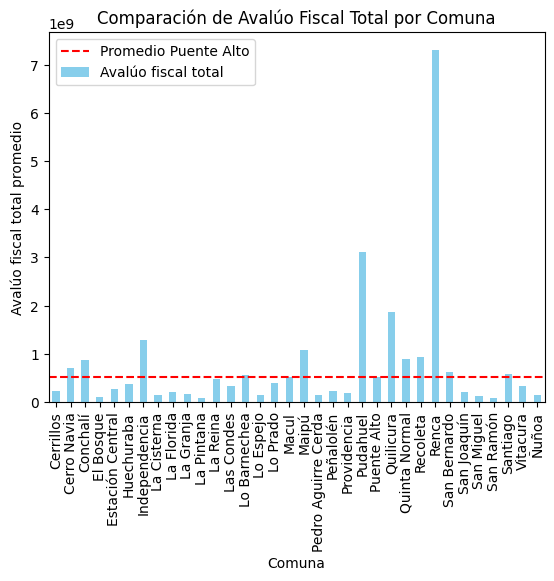

Estadísticas para Puente Alto:
Avalúo fiscal promedio en Puente Alto: 513056238.146999
Contribución semestral promedio en Puente Alto: 2037080.6493554497
Porcentaje de Avalúo Fiscal en Puente Alto: 2.1792016609427485 %
Porcentaje de Contribución en Puente Alto: 2.7791746968761863 %

Estadísticas para otras comunas:
Comuna: Cerrillos
Avalúo fiscal promedio: 226154297.09596366
Contribución semestral promedio: 375233.04357123765


Comuna: Cerro Navia
Avalúo fiscal promedio: 705481381.8747016
Contribución semestral promedio: 1883743.3267853865


Comuna: Conchalí
Avalúo fiscal promedio: 874300729.1149782
Contribución semestral promedio: 1296028.0914014


Comuna: El Bosque
Avalúo fiscal promedio: 107940191.9477808
Contribución semestral promedio: 167888.6972881674


Comuna: Estación Central
Avalúo fiscal promedio: 259878047.86932755
Contribución semestral promedio: 287050.5377066456


Comuna: Huechuraba
Avalúo fiscal promedio: 365255804.7348694
Contribución semestral promedio: 1028464.014350

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que los datos están en un DataFrame llamado 'df'

df = Data

# Filtrar los datos para la comuna de Puente Alto
puente_alto_data = df[df['Comuna'] == 'Puente Alto']

# Calcular estadísticas para Puente Alto
avaluo_promedio_puente_alto = puente_alto_data['Avalúo fiscal total'].mean()
contribucion_promedio_puente_alto = puente_alto_data['Contribución semestral (con aseo)'].mean()

# Calcular estadísticas para todas las comunas
avaluo_promedio_comunas = df.groupby('Comuna')['Avalúo fiscal total'].mean()
contribucion_promedio_comunas = df.groupby('Comuna')['Contribución semestral (con aseo)'].mean()

# Comparar Avalúo Fiscal Total con otras comunas
avaluo_promedio_comunas.plot(kind='bar', color='skyblue')
plt.axhline(avaluo_promedio_puente_alto, color='red', linestyle='--', label='Promedio Puente Alto')
plt.xlabel('Comuna')
plt.ylabel('Avalúo fiscal total promedio')
plt.title('Comparación de Avalúo Fiscal Total por Comuna')
plt.legend()
plt.show()

# Calcular porcentajes
total_avaluo = df['Avalúo fiscal total'].sum()
puente_alto_avaluo = puente_alto_data['Avalúo fiscal total'].sum()
porcentaje_avaluo_puente_alto = puente_alto_avaluo / total_avaluo * 100

total_contribucion = df['Contribución semestral (con aseo)'].sum()
puente_alto_contribucion = puente_alto_data['Contribución semestral (con aseo)'].sum()
porcentaje_contribucion_puente_alto = puente_alto_contribucion / total_contribucion * 100

# Imprimir resultados
print('Estadísticas para Puente Alto:')
print('Avalúo fiscal promedio en Puente Alto:', avaluo_promedio_puente_alto)
print('Contribución semestral promedio en Puente Alto:', contribucion_promedio_puente_alto)
print('Porcentaje de Avalúo Fiscal en Puente Alto:', porcentaje_avaluo_puente_alto, '%')
print('Porcentaje de Contribución en Puente Alto:', porcentaje_contribucion_puente_alto, '%')

print('\nEstadísticas para otras comunas:')
for comuna in avaluo_promedio_comunas.index:
    if comuna != 'Puente Alto':
        print('Comuna:', comuna)
        print('Avalúo fiscal promedio:', avaluo_promedio_comunas.loc[comuna])
        print('Contribución semestral promedio:', contribucion_promedio_comunas.loc[comuna])
        print('\n')


    Avalúo Fiscal y Contribución Semestral Promedio en Puente Alto:
        El avalúo fiscal promedio en Puente Alto es considerablemente menor que en muchas otras comunas, lo que puede indicar que es una comuna con propiedades de menor valor relativo en comparación con otras zonas de Santiago.
        La contribución semestral promedio también es relativamente baja en Puente Alto, lo que puede deberse a los avalúos fiscales más bajos en esta comuna.

    Diferencias en Avalúo Fiscal entre Comunas:
        Existen grandes diferencias en el avalúo fiscal promedio entre las comunas. Por ejemplo, comunas como San Bernardo, Renca y Pudahuel tienen avalúos fiscales promedio significativamente más altos que Puente Alto.
        Por otro lado, comunas como La Pintana, Lo Espejo y Cerro Navia tienen avalúos fiscales promedio más bajos en comparación con otras comunas.

    Influencia de la Riqueza en el Avalúo Fiscal:
        No es estrictamente cierto que solo las comunas "adineradas" tengan altos avalúos fiscales. Por ejemplo, comunas como San Bernardo, Pudahuel y Quilicura tienen avalúos fiscales promedio altos a pesar de no ser consideradas tradicionalmente como las más adineradas.
        El avalúo fiscal puede estar influenciado por varios factores, incluyendo la demanda de propiedades en esa área, infraestructura, accesibilidad, oferta de servicios, entre otros.

    Posible Razón para Avalúos Altos en Renca:
        Renca tiene un avalúo fiscal promedio muy alto en comparación con otras comunas. Esto podría deberse a su ubicación estratégica, cercanía a áreas industriales o factores de desarrollo reciente que han aumentado la demanda de propiedades en esa zona.

Es importante considerar que el avalúo fiscal de una propiedad no solo depende de la capacidad adquisitiva de los residentes en esa área, sino también de diversos factores, como infraestructura, servicios, políticas de valuación, entre otros. Por lo tanto, el valor del avalúo fiscal puede variar independientemente del estatus económico de la comuna.

Estadísticas para Puente Alto:
Promedio de contribución semestral: 2037080.6493554497
Mediana de contribución semestral: 0.0


Estadísticas para otras comunas:
Comuna
Cerrillos              3.752330e+05
Cerro Navia            1.883743e+06
Conchalí               1.296028e+06
El Bosque              1.678887e+05
Estación Central       2.870505e+05
Huechuraba             1.028464e+06
Independencia          4.805360e+06
La Cisterna            1.108046e+05
La Florida             3.061361e+05
La Granja              1.648316e+05
La Pintana             6.513201e+04
La Reina               1.370989e+06
Las Condes             5.445162e+05
Lo Barnechea           1.651074e+06
Lo Espejo              3.798648e+05
Lo Prado               4.300479e+05
Macul                  7.742834e+05
Maipú                  3.272308e+06
Pedro Aguirre Cerda    3.578764e+05
Peñalolén              3.410112e+05
Providencia            3.931998e+05
Pudahuel               1.372133e+07
Quilicura              8.224936e+06
Quint

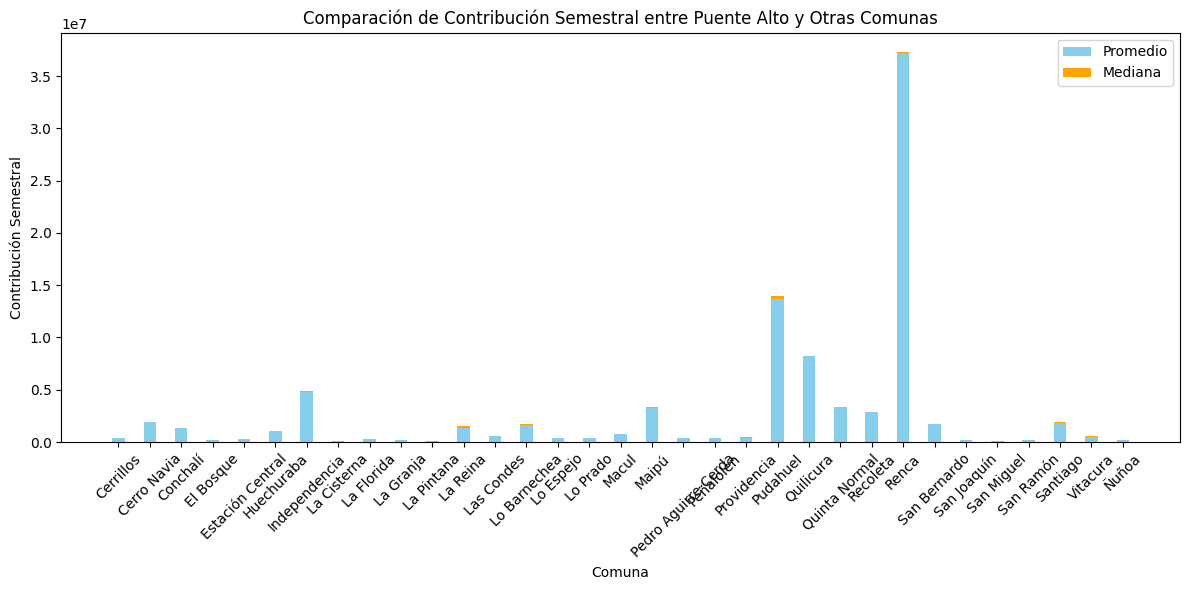

In [7]:
import matplotlib.pyplot as plt

# Filtrar datos para la comuna de Puente Alto y otras comunas
puente_alto_data = df_BD[df_BD['Comuna'] == 'Puente Alto']
otras_comunas_data = df_BD[df_BD['Comuna'] != 'Puente Alto']

# Calcular promedio y mediana de contribución semestral
contribucion_promedio_puente_alto = puente_alto_data['Contribución semestral (con aseo)'].mean()
contribucion_mediana_puente_alto = puente_alto_data['Contribución semestral (con aseo)'].median()

contribucion_promedio_otras_comunas = otras_comunas_data.groupby('Comuna')['Contribución semestral (con aseo)'].mean()
contribucion_mediana_otras_comunas = otras_comunas_data.groupby('Comuna')['Contribución semestral (con aseo)'].median()

# Imprimir estadísticas
print('Estadísticas para Puente Alto:')
print('Promedio de contribución semestral:', contribucion_promedio_puente_alto)
print('Mediana de contribución semestral:', contribucion_mediana_puente_alto)
print('\n')

print('Estadísticas para otras comunas:')
print(contribucion_promedio_otras_comunas)
print(contribucion_mediana_otras_comunas)

# Crear una lista de las comunas y sus respectivos promedios y medianas
comunas = contribucion_promedio_otras_comunas.index.tolist()
promedio_values = contribucion_promedio_otras_comunas.values
mediana_values = contribucion_mediana_otras_comunas.values

# Representar en un gráfico de barras apiladas
x = range(len(comunas))

plt.figure(figsize=(12, 6))
plt.bar(x, promedio_values, width=0.4, label='Promedio', color='skyblue')
plt.bar(x, mediana_values, width=0.4, bottom=promedio_values, label='Mediana', color='orange')

plt.xlabel('Comuna')
plt.ylabel('Contribución Semestral')
plt.title('Comparación de Contribución Semestral entre Puente Alto y Otras Comunas')
plt.xticks(x, comunas, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Para Puente Alto, el promedio de contribución semestral es aproximadamente 2,037,080.652,037,080.65 y la mediana es 0.00.0.

Ahora, veamos algunos ejemplos de otras comunas y sus respectivas contribuciones semestrales promedio:

    Para La Reina, la contribución semestral promedio es aproximadamente 1,370,9891,370,989.
    Para Las Condes, la contribución semestral promedio es aproximadamente 544,516.2544,516.2.
    Para Maipú, la contribución semestral promedio es aproximadamente 3,272,3083,272,308.

Estos valores indican la contribución semestral promedio por propiedad en cada comuna. Podemos notar que comunas como Las Condes y Maipú, que tienen contribuciones semestrales promedio más altas, suelen ser comunas con avalúo fiscal promedio más alto, lo que tiene sentido ya que la contribución está relacionada con el valor de la propiedad.

En contraste, Puente Alto tiene un promedio de contribución semestral menor, lo que también se refleja en su avalúo fiscal promedio más bajo. Es importante tener en cuenta que factores como la infraestructura, servicios y nivel socioeconómico de una comuna pueden influir en estas estadísticas.

En resumen, las estadísticas de contribución semestral y avalúo fiscal tienen una relación lógica, donde comunas con avalúo fiscal más alto tienden a tener contribuciones semestrales promedio más altas y viceversa.


Material Estructural en Santiago:
Material Estructural
-                              261957
Acero                            4228
Hormigón Armado                  1130
Madera                            822
Albañilería                       507
Techumbre Apoyada de Acero        181
Techumbre Apoyada de Madera        64
Adobe                              40
Silo de Acero                      12
Estanque de Hormigón Armado        11
Estanque de Acero                  11
Silo de Hormigón Armado             5
Name: count, dtype: int64

Material Estructural en Quinta Normal:
Material Estructural
-                              38401
Acero                           2216
Madera                           871
Hormigón Armado                  465
Albañilería                      369
Techumbre Apoyada de Acero        81
Adobe                             48
Techumbre Apoyada de Madera       26
Silo de Acero                     14
Estanque de Hormigón Armado        4
Silo de Hormigón Armado        

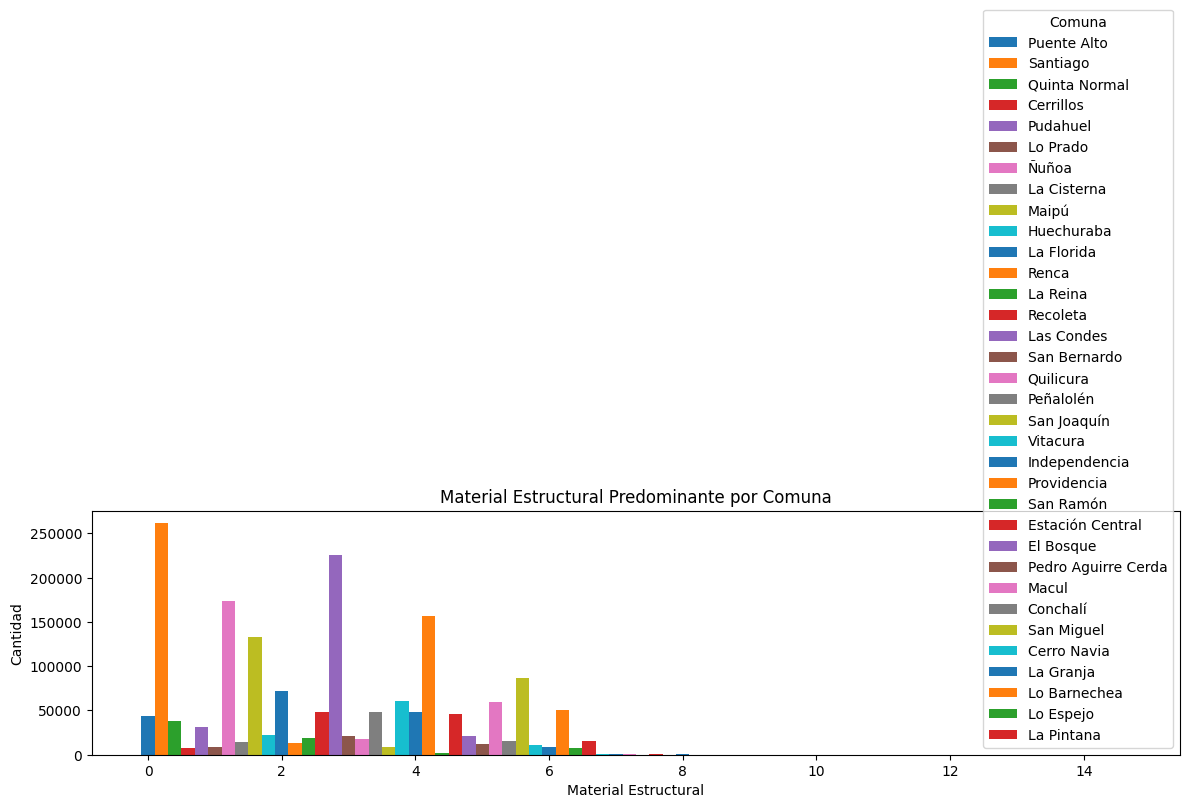

In [11]:
import matplotlib.pyplot as plt

# Filtrar datos para la comuna de Puente Alto y otras comunas
puente_alto_data = df_BD[df_BD['Comuna'] == 'Puente Alto']
comunas_unicas = df_BD['Comuna'].unique()

# Calcular el material estructural predominante en Puente Alto
material_puente_alto = puente_alto_data['Material Estructural'].str.split(',').explode().str.strip()
conteo_material_puente_alto = material_puente_alto.value_counts()

# Inicializar un diccionario para almacenar los conteos de materiales por comuna
conteo_por_comuna = {}

# Iterar sobre cada comuna y calcular el conteo de materiales estructurales
for comuna in comunas_unicas:
    if comuna != 'Puente Alto':
        comuna_data = df_BD[df_BD['Comuna'] == comuna]
        material_comuna = comuna_data['Material Estructural'].str.split(',').explode().str.strip()
        conteo_material_comuna = material_comuna.value_counts()
        conteo_por_comuna[comuna] = conteo_material_comuna

# Imprimir conteo de materiales por comuna
for comuna, conteo_material_comuna in conteo_por_comuna.items():
    print(f'\nMaterial Estructural en {comuna}:')
    print(conteo_material_comuna)

# Representar en un gráfico de barras agrupadas
labels = conteo_material_puente_alto.index
x = range(len(labels))

plt.figure(figsize=(12, 6))

# Graficar para Puente Alto
plt.bar(x, conteo_material_puente_alto.values, width=0.2, label='Puente Alto')

# Graficar para otras comunas
for i, (comuna, conteo_material_comuna) in enumerate(conteo_por_comuna.items()):
    plt.bar([p + 0.2 * (i + 1) for p in x], conteo_material_comuna.reindex(labels, fill_value=0).values,
            width=0.2, label=comuna)

plt.xlabel('Material Estructural')
plt.ylabel('Cantidad')
plt.title('Material Estructural Predominante por Comuna')
plt.xticks([p + 0.4 for p in x], labels)
plt.legend(title='Comuna')
plt.tight_layout()
plt.show()


    Materiales Estructurales:
        En Santiago, el material estructural más común es "-", seguido por acero y hormigón armado. Esto puede indicar una diversidad de materiales utilizados en las construcciones de la comuna.
        En otras comunas, se observa una variabilidad en los materiales predominantes. Por ejemplo, en Quilicura, el acero es el material más común, mientras que en La Granja, es el hormigón armado.

    Relación entre Material Estructural y Contribución:
        Sería interesante explorar si hay alguna relación entre el tipo de material estructural predominante en una comuna y la contribución semestral promedio. Por ejemplo, si ciertos materiales están asociados con propiedades más valiosas y, por lo tanto, contribuciones más altas.

En general, estos datos proporcionan una visión comparativa de la valuación de propiedades y la estructura de contribuciones en diferentes comunas, así como una idea de los materiales estructurales utilizados en las construcciones en cada comuna. Sería beneficioso realizar un análisis más detallado para extraer relaciones más precisas y significativas.

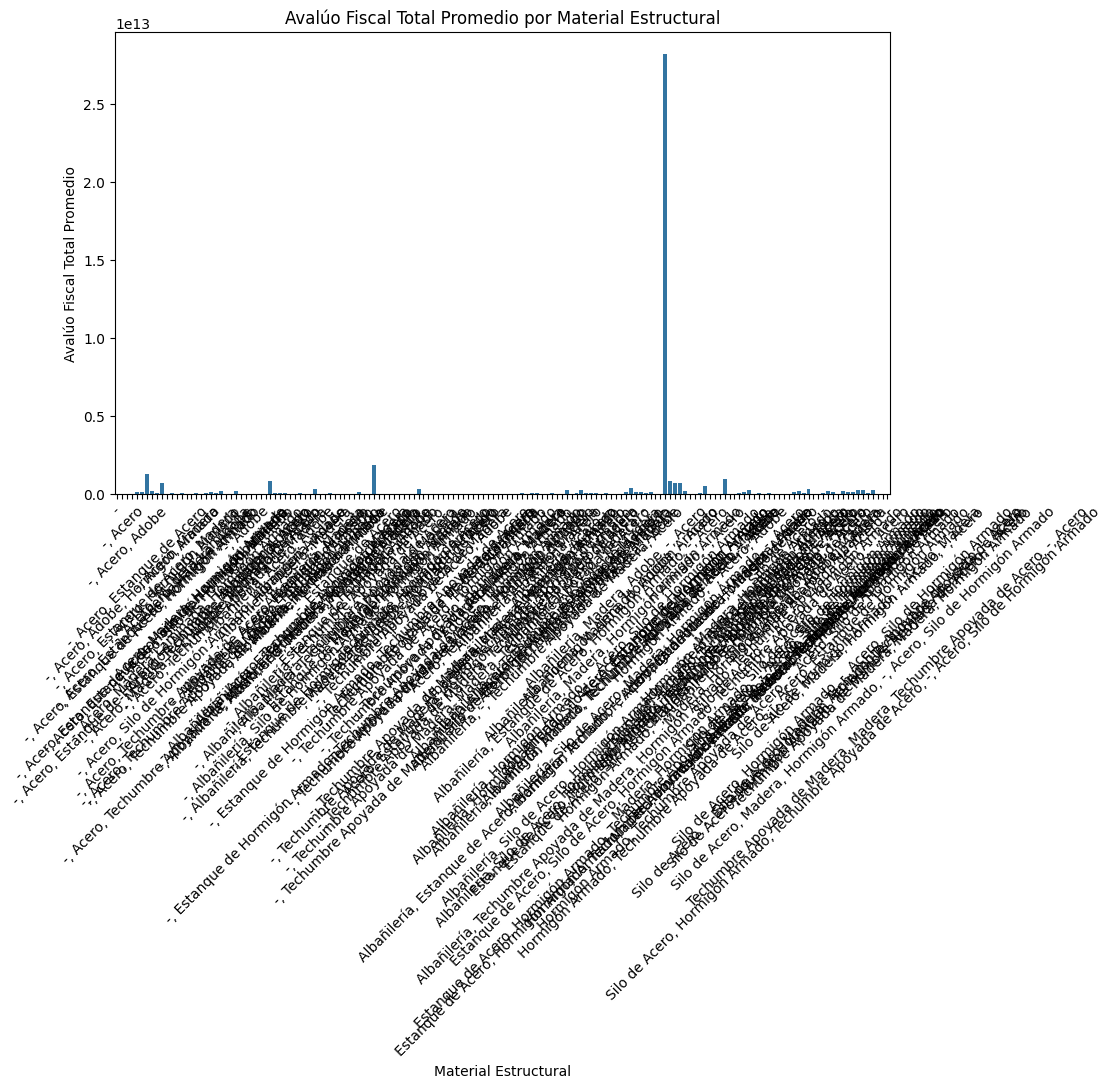

Resultados ANOVA:
F_onewayResult(statistic=4013.192124762511, pvalue=0.0)


ValueError: could not convert string to float: '-'

In [15]:
from scipy.stats import f_oneway

# 1. Análisis Descriptivo
contribucion_por_material = df.groupby('Material Estructural')['Avalúo fiscal total'].mean()

# 2. Visualización de Datos
plt.figure(figsize=(10, 6))
sns.barplot(x=contribucion_por_material.index, y=contribucion_por_material.values)
plt.xlabel('Material Estructural')
plt.ylabel('Avalúo Fiscal Total Promedio')
plt.title('Avalúo Fiscal Total Promedio por Material Estructural')
plt.xticks(rotation=45)
plt.show()

# 3. Análisis Estadístico (ANOVA)
anova_result = f_oneway(*[df['Avalúo fiscal total'][df['Material Estructural'] == material] for material in df['Material Estructural'].unique()])
print('Resultados ANOVA:')
print(anova_result)

# 4. Correlación y Regresión
correlation_matrix = df.groupby('Material Estructural')[['Material Estructural', 'Avalúo fiscal total']].corr().unstack().iloc[:, 1]

# 5. Segmentación de Datos
segmented_data = df.groupby(['Material Estructural', pd.cut(df['tamaño_propiedad'], bins=3)])['Avalúo fiscal total'].mean()
